In [2]:
#! /usr/bin/python3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# compute prefactor using:
# eta = 1/2*Aeq^(-1/n) * strain_rate^((1-n)/n) * exp((E+PV)/nRT)
# Aeq   = ((2 *eta)^(-n)) / (strain_rate^(n-1) * exp(-(E+PV)/RT))

# reference conditions for the upper mantle
depth_ref  = 20e3 # m
visc_ref_crust   = 1e21
visc_ref_sed   = 1e20
temp_ref   = 495
# strain_ref = 2.6e-16
midmantle_viscosity_jump = 25

cr_yr = 0.05 #m/yr
yr = 365*24*60*60
cr = cr_yr/yr #m/s
shear_d = 2000 #m

strain_ref = cr/shear_d

Esed = 125e3
Vsed = 0
nsed = 4;        R = 8.314

Ecrust = 482e3; Ediff = 0
Vcrust = 0;  Vdiff = 0; Vdiff_lowermant = 0
ncrust = 4.7;        R = 8.314

adiabat = 0.3; # K/km
temp_ref   = temp_ref + (depth_ref * 1e-3 * adiabat)
press_ref  = 2900. * 9.81 * depth_ref


################# SEDIMENTS ####################
Ased = ((2*visc_ref_sed)**(-1. * nsed)) / (  strain_ref**(nsed-1) * np.exp(-(Esed+press_ref*Vsed)/(R*temp_ref))  )
visc_check_sed = (1/2)*Ased**(-1/nsed) * strain_ref**((1-nsed)/nsed) * np.exp((Esed+press_ref*Vsed)/(nsed*R*temp_ref))
print("sediments prefactor = %e. Check: %e = %e" % (Ased,visc_ref_sed,visc_check_sed))


################# CRUST ####################
Acrust = ((2*visc_ref_crust)**(-1. * ncrust)) / (  strain_ref**(ncrust-1) * np.exp(-(Ecrust+press_ref*Vcrust)/(R*temp_ref))  )
visc_check_crust = (1/2)*Acrust**(-1/ncrust) * strain_ref**((1-ncrust)/ncrust) * np.exp((Ecrust+press_ref*Vcrust)/(ncrust*R*temp_ref))
print("crust prefactor = %e. Check: %e = %e" % (Acrust,visc_ref_crust,visc_check_crust))

sediments prefactor = 1.353771e-32. Check: 1.000000e+20 = 1.000000e+20
crust prefactor = 8.200986e-06. Check: 1.000000e+21 = 1.000000e+21


crust prefactor = 7.861326e-12. Check: 7.915789e+20 = 7.915789e+20
0.6666666666666666


Text(0.5, 1.0, 'Isoviscous equivalent')

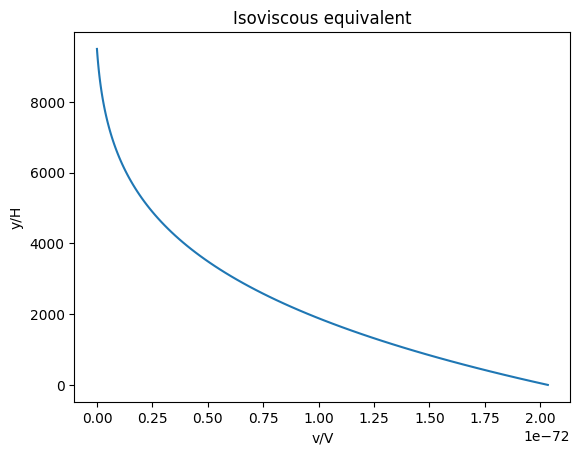

In [3]:
########## EASY: avg visc for channel ###########

visc_sed = 1e19
visc_crust = 1e21
rho_sed = 2700
rho_crust = 2900
sed = 2e3
crust = 7.5e3

visc = (visc_sed*sed + visc_crust*crust)/(sed+crust)
rho = (rho_sed*sed + rho_crust*crust)/(sed+crust)
drho = (3300-rho)

n = (nsed*sed + ncrust*crust)/(sed+crust)
E = (Esed*sed + Ecrust*crust)/(sed+crust)

################# EQUIV ####################
Aeq = ((2*visc)**(-1. * n)) / (  (strain_ref**(n-1)) * np.exp(-(E)/(R*temp_ref))  )
visc_check_crust = (1/2)*Aeq**(-1/n) * strain_ref**((1-n)/n) * np.exp((E)/(n*R*temp_ref))
print("crust prefactor = %e. Check: %e = %e" % (Aeq,visc,visc_check_crust))

vop = -0.016  #cm/yr
vop_s = vop/(365*24*60*60)
dip = np.radians(25)
tau = 7.e8
g = 9.81
h = sed+crust

C = np.exp(E/(n*R*temp_ref))/((np.sqrt(3)**(n+1))*Aeq*strain_ref**((n-1)/n))
# buoy = g*np.sin(dip)*drho
# buoy_stress = buoy*h
# gamma = tau/buoy_stress
buoy_stress = 15e6
tau = 10e6
gamma = tau/buoy_stress
buoy = buoy_stress/h
buoy = tau/gamma
print(gamma)

y = np.linspace(0,9.5e3, 100)
v = np.zeros(len(y))
# v[0] = (vop_s + (((buoy/(C))**n)*1/(n+1)*((h*(gamma+1) - y[0])**(n+1) - (h*gamma)**n+1))*(365*24*60*60))

for i in range(0,len(y)):
    v[i] =  ( ((buoy/(C))**n)*(1/(n+1))*((h*(gamma+1) - y[i])**(n+1) - (h*gamma)**(n+1)))
    # v[i] = vop_s + (v[0] - vop_s)*( (1+gamma-(y[i]/h))**(n+1) - gamma**(n+1))/((1+gamma)**(n+1) - gamma**(n+1))

for i in range(0, len(y)):
    v[i] = v[i]*1e3 #*(365*24*60*60)

# plt.plot(v/abs(max(v)), y/max(y))
plt.plot(v, y)
plt.xlabel("v/V")
plt.ylabel("y/H")
plt.title("Isoviscous equivalent")
# plt.xlim(0,1)
# plt.ylim(0,1)


In [4]:
ysed = np.linspace(0,crust, 20)
ycrust = np.linspace(crust,sed, 80)
y = np.linspace(0,9.5e3, 100)
v = np.zeros((len(ysed)+len(ycrust)))

vop = -0.016  #cm/yr
vop_s = vop #/(365*24*60*60)
dip = np.radians(25)
tau = 7.1e8
g = 9.81
h = sed+crust


Csed = pow((np.exp(E/(nsed*R*temp_ref))/((np.sqrt(3)**(nsed+1))*Ased)), n+1)

# Csed = np.exp(Esed/(R*temp_ref))/(2*Ased)
buoy_sed = g*np.sin(dip)*(3300-rho_sed)
buoy_stress_sed = buoy_sed*sed
gamma_sed = tau/buoy_stress_sed

Ccrust = np.exp(E/(ncrust*R*temp_ref))/((np.sqrt(3)**(ncrust+1))*Acrust*strain_ref**((ncrust-1)/ncrust))

buoy_crust = g*np.sin(dip)*(3300-rho_crust)
buoy_stress_crust = buoy_crust*crust
gamma_crust = tau/buoy_stress_crust




In [5]:
c = len(ycrust)
s = len(ysed)
for i in range(len(ycrust)):
    v[i] = (((( buoy_crust/(Ccrust))**ncrust)*1/(ncrust+1)*((crust*(gamma_crust+1) - ycrust[i])**(ncrust+1) - (crust*gamma_crust)**(ncrust+1))))
for i in range(len(ysed)):
    v[i+c] = ((((buoy_sed/(Csed))**nsed)*1/(nsed+1)*((sed*(gamma_sed+1) - ysed[i])**(nsed+1) - (sed*gamma_sed)**(nsed+1))))
    

Text(0.5, 1.0, 'Layered rheology ')

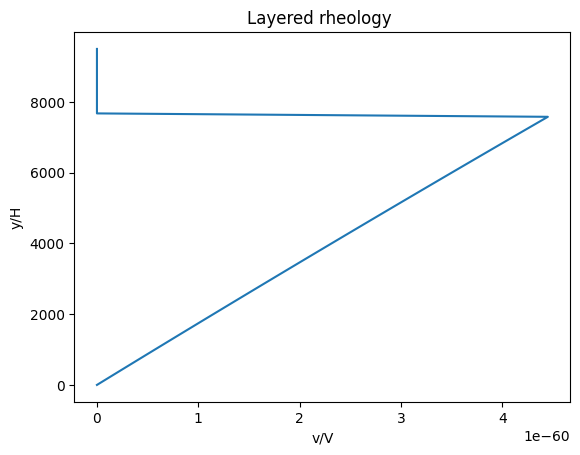

In [6]:
# plt.plot(v/abs(min(v)), y/max(y))
plt.plot(v, y)
plt.xlabel("v/V")
plt.ylabel("y/H")
plt.title("Layered rheology ")
# plt.xlim(0,1)
# plt.ylim(0,1)